In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [2]:
import json
import matplotlib.pyplot as plt


from Constant import Constant
from Player import Player
from Team import Team

In [3]:
"""
Extract data from 2D position data file
"""

# Opening JSON file
file = open('../data/12-05-2015.PHX.WAS.17913.Q4.2D-POS.json')
 
# returns JSON object as 
# a dictionary
data = json.load(file)

frame_ids = list(data.keys())

In [4]:
"""
Extract team information from original statvu log file
"""

origin = open('../data/0021500284.json')
origin_data = json.load(origin)

visitor_data = origin_data["events"][0]["visitor"]
visit_player_list = []

visitor: Team = Team(visitor_data["teamid"], True)

for player_data in visitor_data["players"]:
    player = Player(
        player_data["playerid"],
        player_data["firstname"],
        player_data["lastname"],
        player_data["jersey"],
        visitor
    )

    visit_player_list.append(player)



home_data = origin_data["events"][0]["home"]
home_player_list = []

home: Team = Team(home_data["teamid"], False)

for player_data in home_data["players"]:
    player = Player(
        player_data["playerid"],
        player_data["firstname"],
        player_data["lastname"],
        player_data["jersey"],
        home
    )

    home_player_list.append(player)

player_dict = {}

for player in home_player_list + visit_player_list:
    player_dict[player.id] = player


In [5]:
player_dict

{2400: <player.Player at 0x282d33876e0>,
 2743: <player.Player at 0x282d3387680>,
 200797: <player.Player at 0x282d3387710>,
 201162: <player.Player at 0x282d3387740>,
 201196: <player.Player at 0x282d3387770>,
 201971: <player.Player at 0x282d33877a0>,
 202066: <player.Player at 0x282d33877d0>,
 202322: <player.Player at 0x282d3387800>,
 202390: <player.Player at 0x282d3387830>,
 203078: <player.Player at 0x282d3387860>,
 203490: <player.Player at 0x282d3387890>,
 1626162: <player.Player at 0x282d33878c0>,
 101179: <player.Player at 0x282d3387470>,
 200782: <player.Player at 0x282f900e9f0>,
 201603: <player.Player at 0x282d3387440>,
 202339: <player.Player at 0x282d33874a0>,
 202688: <player.Player at 0x282d33874d0>,
 202693: <player.Player at 0x282d3387500>,
 202720: <player.Player at 0x282d3387530>,
 203141: <player.Player at 0x282d3387560>,
 203458: <player.Player at 0x282d3387590>,
 203462: <player.Player at 0x282d33875c0>,
 203928: <player.Player at 0x282d33875f0>,
 203933: <play

```json
{
    "team_id": 1610612764,
    "player_id": 202390,
    "x_position": 10.53784,
    "y_position": 10.05833,
    "z_position": 0.0
}
```

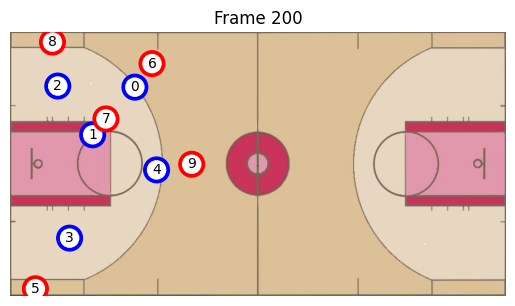

In [6]:
"""
just drawing
"""

# pyplot configs
fig,ax = plt.subplots(1)
plt.title("Frame 200")
ax.set_aspect('equal')
ax.axis('off')

player_circles = []
team_circles = []

frame_200 = data[frame_ids[200]]

for player in frame_200["player_positions"][1:]:
    x = player["x_position"]
    y = player["y_position"]
    t_circle = None
    if player["team_id"] == visitor.id:
        t_circle = plt.Circle((x, y), Constant.TEAM_CIRCLE_SIZE, color=visitor.color)
    else:
        t_circle = plt.Circle((x, y), Constant.TEAM_CIRCLE_SIZE, color=home.color)
    
    team_circles.append(t_circle)




for index, player in enumerate(frame_200["player_positions"][1:]):
    player_info = player_dict[player["player_id"]]
    x = player["x_position"]
    y = player["y_position"]
    p_circle = plt.Circle((x, y), Constant.PLAYER_CIRCLE_SIZE, color='#FFFFFF')
    player_circles.append(p_circle)
    # Add text on top of the circle
    text = ax.text(x, y, index, color='black', ha='center', va='center')



court = plt.imread("../data/court.png")
plt.imshow(court, zorder=0, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF, Constant.Y_MAX, Constant.Y_MIN])

# Now, loop through coord arrays, and create a circle at each x,y pair
for p_circle, t_circle in zip(player_circles, team_circles):
    ax.add_patch(t_circle)
    ax.add_patch(p_circle)

plt.show()

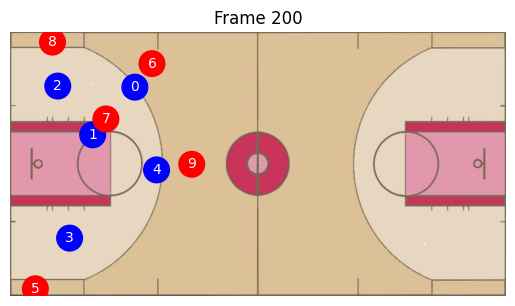

In [8]:
"""
just drawing
"""

# pyplot configs
fig,ax = plt.subplots(1)
plt.title("Frame 200")
ax.set_aspect('equal')
ax.axis('off')

# player_circles = []
team_circles = []



frame_200 = data[frame_ids[200]]

for player in frame_200["player_positions"][1:]:
    x = player["x_position"]
    y = player["y_position"]
    t_circle
    if player["team_id"] == visitor.id:
        t_circle = plt.Circle((x, y), Constant.TEAM_CIRCLE_SIZE, color=visitor.color)
    else:
        t_circle = plt.Circle((x, y), Constant.TEAM_CIRCLE_SIZE, color=home.color)
    
    team_circles.append(t_circle)




for index, player in enumerate(frame_200["player_positions"][1:]):
    x = player["x_position"]
    y = player["y_position"]
    # p_circle = plt.Circle((x, y), Constant.PLAYER_CIRCLE_SIZE, color='#FFFFFF')
    # player_circles.append(p_circle)
    # Add text on top of the circle
    text = ax.text(x, y, index, color='white', ha='center', va='center')


court = plt.imread("../data/court.png")
plt.imshow(court, zorder=0, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF, Constant.Y_MAX, Constant.Y_MIN])

# Now, loop through coord arrays, and create a circle at each x,y pair
for t_circle in team_circles:
    ax.add_patch(t_circle)
    # ax.add_patch(p_circle)

plt.show()